In [5]:
def fib(n):
    """Compute the nth Fibonacci number, for n >= 2."""
    pred, curr = 0, 1   # Fibonacci numbers 1 and 2
    k = 2               # Which Fib number is curr?
    while k < n:
        pred, curr = curr, pred + curr
        k = k + 1
    return curr

断言（Assertions）：程序员使用 assert 语句来验证是否符合预期，例如验证被测试函数的输出。`assert` 语句在布尔上下文中有一个表达式，后面是一个带引号的文本行（单引号或双引号都可以，但要保持一致），如果表达式的计算结果为假值，则显示该行。

In [6]:
assert fib(8) == 13, '第八个斐波那契数应该是 13'

文档测试（Doctests）：Python 提供了一种方便的方法，可以将简单的测试直接放在函数的文档字符串中。文档字符串的第一行应该包含函数的单行描述，接着是一个空行，下面可能是参数和函数意图的详细描述。此外，文档字符串可能包含调用该函数的交互式会话示例：

In [7]:
def sum_naturals(n):
    """返回前 n 个自然数的和。

    >>> sum_naturals(10)
    55
    >>> sum_naturals(100)
    5050
    """
    total, k = 0, 1
    while k <= n:
        total, k = total + k, k + 1
    return total

如果仅想验证单个函数的 `doctest` 交互，我们可以使用名为 `run_docstring_examples` 的 `doctest` 函数。不幸的是，这个函数调用起来有点复杂。第一个参数是要测试的函数；第二个参数应该始终是表达式 `globals()` 的结果，这是一个用于返回全局环境的内置函数；第三个参数 `True` 表示我们想要“详细”输出：所有测试运行的目录。

In [8]:
from doctest import run_docstring_examples
run_docstring_examples(sum_naturals, globals(), True)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "d:\APython3.12\Lib\doctest.py", line 1529, in run
    sys.settrace(save_trace)



Finding tests in NoName
Trying:
    sum_naturals(10)
Expecting:
    55
ok
Trying:
    sum_naturals(100)
Expecting:
    5050
ok


### 高阶函数
这个 `improve` 函数是迭代求精（`repetitive refinement`）的通用表达式。它并不会指定要解决的问题，而是会将这些细节留给作为参数传入的 `update` 和 `close` 函数。

In [9]:
def improve(update, close, guess=1):
    while not close(guess):
        guess = update(guess)
    return guess

调用 `approx_eq` 函数：如果其参数大致相等，则返回 `True`

In [10]:
def approx_eq(x, y, tolerance=1e-15):
    return abs(x - y) < tolerance

In [11]:
def average(x, y):
    return (x + y)/2

def sqrt_update(x, a):
    return average(x, a/x)

### 嵌套定义
上面的示例演示了将函数作为参数传递的能力显著地增强编程语言的表达能力。每个通用概念或方程都能映射到自己的小型函数上，但这种方法的一个负面后果是全局帧会变得混乱，因为小型函数的名称必须都是唯一的。另一个问题是我们受到特定函数签名的限制：`improve` 的 `update` 参数只能接受一个参数。嵌套函数定义（`Nested function definition`）解决了这两个问题，但需要我们丰富一下环境模型。

In [12]:
def sqrt(a):
    def sqrt_update(x):
        return average(x, a/x)
    def sqrt_close(x):
        return approx_eq(x * x, a)
    return improve(sqrt_update, sqrt_close)

In [13]:
sqrt(256)

16.0

如何求得一个反函数

In [14]:
def search(f):
    x = 0
    while not f(x):
        x += 1
    return x
def inverse(f):
    return lambda y: search(lambda x: f(x) == y)
sqrt = inverse(lambda x: x * x)
sqrt(256)

16

举例：牛顿法

In [15]:
def newton_update(f, df):
    def update(x):
        return x - f(x) / df(x)  # 梯度
    return update

In [16]:
def find_zero(f, df):
    def near_zero(x):
        return approx_eq(f(x), 0)  # 是否接近零点
    return improve(newton_update(f, df), near_zero)

In [17]:
def power(x, n):
    """返回 x * x * x * ... * x，n 个 x 相乘"""
    product, k = 1, 0
    while k < n:
        product, k = product * x, k + 1
    return product

def nth_root_of_a(n, a):
    def f(x):
        return power(x, n) - a
    def df(x):
        return n * power(x, n-1)
    return find_zero(f, df)

nth_root_of_a(2, 64)

8.0

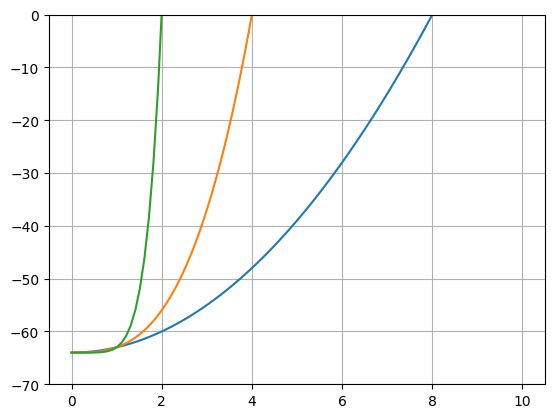

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, n, a):
    return x ** n - a

a = 64
x = np.linspace(0, 10, 100)
plt.ylim(-70, 0)
plt.plot(x, f(x, 2, a), x, f(x, 3, a), x, f(x, 6, a))
plt.grid()
plt.show()


递归

In [19]:
grow = lambda n: f_then_g(grow, print, n // 10)
shrink = lambda n: f_then_g(print, shrink, n // 10)

def f_then_g(f, g, n):
    if n:
        f(n)
        g(n)
def inverse_cascode(n):
    grow(n)
    print(n)
    shrink(n)

inverse_cascode(12345)

1
12
123
1234
12345
1234
123
12
1


切片与列表（一种实现链表的原理）

作为左值使用会改变原位置的指向

作为右值使用会返回一个新列表

In [20]:
t = [1, 3, 2]
t[1:3] = [t]
t[1] is t

True

In [21]:
s = [[1, 2], [3, 4]]
s[0].append(s[1:2])
s

[[1, 2, [[3, 4]]], [3, 4]]

树的数据抽象由构造函数 `tree`、选择器 `label` 和 `branches` 组成

只有当树有根标签并且所有分支也是树时，树才是结构良好的。在 `tree` 构造函数中使用了 `is_tree` 函数以验证所有分支是否结构良好。

`is_leaf` 函数检查树是否有分支，若无分支则为叶子节点

In [22]:
def tree(root_label, branches=[]):
    for branch in branches:
        assert is_tree(branch), '分支必须是树'
    return [root_label] + list(branches)
def label(tree):
    return tree[0]
def branches(tree):
    return tree[1:]
def is_tree(tree):
    if type(tree) != list or len(tree) < 1:
        return False
    for branch in branches(tree):
        if not is_tree(branch):
            return False
    return True
def is_leaf(tree):
    return not branches(tree)

In [23]:
# 树可以通过嵌套表达式来构造
tree(3, [tree(1), tree(2, [tree(1), tree(1)])])

[3, [1], [2, [1], [1]]]

**分割树**（Partition trees）：树也可以用来表示将一个正整数分割为若干个正整数的过程。比如可通过一个形式为二叉树的分割树来表示将 `n` 分割为不超过 `m` 的若干正整数之和的计算过程中所做的选择。在非叶子节点的分割树节点中：

• 根标签是 `m`。

• 左侧（索引 0）分支包含划分 `n` 时至少使用一个 `m` 的所有方法

• 右侧（索引 1）分支包含划分 `n` 时使用的正整数不超过 `m - 1` 的所有方法

分割树叶子节点上的标签表示从树根到叶子的路径是否分割成功。

In [24]:
def partition_tree(n, m):
    """返回将 n 分割成不超过 m 的若干正整数之和的分割树"""
    if n == 0:
        return tree(True)
    elif n < 0 or m == 0:
        return tree(False)
    else:
        left = partition_tree(n-m, m)
        right = partition_tree(n, m-1)
        return tree(m, [left, right])
    
def print_parts(tree, partition=[]):
        if is_leaf(tree):
            if label(tree):
                print(' + '.join(partition))
        else:
            left, right = branches(tree)
            m = str(label(tree))
            print_parts(left, partition + [m])
            print_parts(right, partition)

另一个遍历树的树递归过程是将分割树的所有分割方案打印。每个分区都构造为一个列表，当到达叶子节点且节点标签为 `True` 时就会打印分区。

In [25]:
print_parts(partition_tree(2, 2))

2
1 + 1


In [26]:
empty = 'empty'
def is_link(s):
    """判断 s 是否为链表"""
    return s == empty or (len(s) == 2 and is_link(s[1]))
def link(first, rest):
    """用 first 和 rest 构建一个链表"""
    assert is_link(rest), " rest 必须是一个链表"
    return [first, rest]
def first(s):
    """返回链表 s 的第一个元素"""
    assert is_link(s), " first 只能用于链表"
    assert s != empty, "空链表没有第一个元素"
    return s[0]
def rest(s):
    """返回 s 的剩余元素"""
    assert is_link(s), " rest 只能用于链表"
    assert s != empty, "空链表没有剩余元素"
    return s[1]

In [27]:
four = link(1, link(2, link(3, empty)))
four

[1, [2, [3, 'empty']]]

我们可以利用列表的构造器函数 `list` 来对一个列表进行复制。复制完成后，两个列表数据的改动不会再影响彼此，除非二者共享了同一份数据。

```python
>>> nest = list(suits)  # 复制一个与 suits 相同的列表，并命名为 nest
```

Python 语言并不让我们直接访问列表的实现细节，而只提供了语言内置的可以变更数据的方法。为了理解如何使用具有局部状态的函数来表示可变列表，我们现在将开发一个可变链表的实现。

In [28]:
def join_link(s, separator):
        """返回由 separator 分隔的 s 中的所有元素组成的字符串"""
        if s == empty:
            return ""
        elif rest(s) == empty:
            return str(first(s))
        else:
            return str(first(s)) + separator + join_link(rest(s), separator)

In [29]:
def mutable_link():
    """返回一个可变链表的函数"""
    contents = empty
    def dispatch(message, value=None):
        nonlocal contents
        if message == 'len':
            return len_link(contents)
        elif message == 'getitem':
            return getitem_link(contents, value)
        elif message == 'push_first':
            contents = link(value, contents)
        elif message == 'pop_first':
            f = first(contents)
            contents = rest(contents)
            return f
        elif message == 'str':
            return join_link(contents, ", ")
    return dispatch

In [30]:
def to_mutable_link(source):
    """返回一个与原列表相同内容的函数列表"""
    s = mutable_link()
    for element in reversed(source):
        s('push_first', element)
    return s

In [31]:
s = to_mutable_link([1, 2, 3, 4])
print(s('str'))

1, 2, 3, 4


迭代器可以返回自身

In [32]:
ss = [1,2,3,4,5,6,7,8,9]
t = iter(ss)
tt = iter(t)
while True:
    try:
        print(next(t), end=' ')
        print(next(tt))
    except StopIteration:
        break

1 2
3 4
5 6
7 8
9 

Python中所有的对象都有两种字符串表示形式：`str` 和 `repr`。One of is legible to humans, another is legible to Python interpreter.

In [33]:
# repr字符串可以被重新计算为原对象
from fractions import Fraction
frac = eval(repr(Fraction(1, 2)))
isinstance(frac, Fraction)

True

In [34]:
print(str(Fraction))
print(repr(Fraction))
print(str(frac))
print(repr(frac))
print(repr(min))
print(str(min))

<class 'fractions.Fraction'>
<class 'fractions.Fraction'>
1/2
Fraction(1, 2)
<built-in function min>
<built-in function min>


内置的 `str` 和 `repr` 函数表现出多态性，根据传入的参数类型，返回不同的字符串表示形式。

They invoke a zero-argument method on their argument.

这实际上是通过传入对象的 `__str__` 和 `__repr__` 方法来实现的。在 Python 中，每个对象都可以定义自己的 `__str__` 和 `__repr__` 方法，从而改变 `str` 和 `repr` 函数的行为。

In [35]:
class Bear:
    '''当没有__str__方法时，默认使用__repr__'''
    def __repr__(self):
        return 'Bear()'
oski = Bear()
print(oski)
print(str(oski))
print(repr(oski))
print(oski.__str__())
print(oski.__repr__())

class Bear:
    def __repr__(self):
        return 'Bear()'
    def __str__(self):
        return 'a bear'
oski = Bear()
print(oski)
print(str(oski))
print(repr(oski))
print(oski.__str__())
print(oski.__repr__())

Bear()
Bear()
Bear()
Bear()
Bear()
a bear
a bear
Bear()
a bear
Bear()


In [36]:
class Bear:
    '''内置的str和repr函数会忽略实例属性，而通过点表达式进行计算时，首先会匹配到实例属性'''
    def __init__(self):
        self.__repr__ = lambda: 'oski'
        self.__str__ = lambda: 'this bear'
    def __repr__(self):
        return 'Bear()'
    def __str__(self):
        return 'a bear'
oski = Bear()
print(oski)
print(str(oski))
print(repr(oski))
print(oski.__str__())
print(oski.__repr__())

a bear
a bear
Bear()
this bear
oski


In [37]:
# 真正的内部实现应该是这样（忽略实例属性的特征）：
def repr(x):
    return type(x).__repr__(x)
def str(x):
    t = type(x)
    if hasattr(t, '__str__'):
        return t.__str__(x)
    else:
        return repr(x)
oski = Bear()
print(oski)
print(str(oski))
print(repr(oski))
print(oski.__str__())
print(oski.__repr__())

a bear
a bear
Bear()
this bear
oski


#### Message Passing
在面向对象编程中，对象之间的交互是通过发送消息来实现的。`Python` 中是通过查找对象的 `attribute` 或是 `method` 来实现的，这种机制允许不同的对象通过相同的属性名称来响应消息。
#### Shared Message
共享消息的概念是基于多态性，即不同的类可以实现同样的接口或方法，这样就能够对同样的消息（方法调用）作出相似的反应。这样的方法提供了一种强大的抽象手段
#### Interface
接口是一组 `Shared Message` 以及这些消息的含义的规范。通过实现相同接口的方法，不同的类可以保证提供一致的行为，这样调用者可以不用关心对象的具体类型，只需关注其接口定义。
#### Example
实现了 `__repr__` 和 `__str__` 方法的类，提供了一个用于生成字符串表示的接口。不同的类通过实现这两个方法，提供了一种统一的方式将对象转换为字符串。这种实现方式创建了一个接口，使得这些类能够在生成字符串表示时表现出一致的行为。

In [38]:
class Radio:
    def __init__(self, n, d) -> None:
        self.numer = n
        self.denom = d
    def __repr__(self) -> str:
        return f'Radio({self.numer}, {self.denom})'
    def __str__(self) -> str:
        return f'{self.numer}/{self.denom}'
    def __add__(self, other):
        if isinstance(other, int):
            other = Radio(other, 1)
        if isinstance(other, float):
            return float(self) + other
        n = self.numer * other.denom + other.numer * self.denom
        d = self.denom * other.denom
        g = gcd(n, d)
        return Radio(n // g, d // g)
    def __eq__(self, value: object) -> bool:
        if isinstance(value, int):
            return float(self) == value
        if isinstance(value, float):
            return value == float(self)
        return self.numer == value.numer and self.denom == value.denom

    def __float__(self):
        return self.numer / self.denom
    __radd__ = __add__
    
def gcd(a, b):
    while a != b:
        a, b = min(a, b), abs(a - b)
    return a

In [39]:
Radio(1, 3) + 1 == 1 + Radio(1, 3)

True

`Tail recursion` is a special case of recursion where the recursive call is the last operation in the function. This allows the compiler or interpreter to optimize the recursion and avoid stack overflow.Tail recursion functions can take constant space, as the recursive call does not create new frames, the value of expression can just return by the last recursive call.
For example:
```python
def factorial(n, acc):
    if n == 0:
        return acc
    else:
        return factorial(n - 1, n * acc)
```
As a result, the procedure can be optimized to an iterative one when interpreted or compiled. (Maybe someway that use a iter loop where each turn use updated parameters). Python does not support tail recursion optimization, but languages like Scheme and Haskell do.
```scheme
(define (factorial n k) 
  (if (= n 0) 
      k 
      (factorial (- n 1) (* k n))))
```
There's a distinction that figures out whether a procedure call is tail call or not. A tail call is a procedure call in tail context which the tail context is defined as the last part of a procedure, for example: the last sub-expression of a lambda expression, the 2 & 3 sub-expression of an if expression, etc. Then, the procedure call itself should not do any otherthing after the call, for example:
```scheme
(define (length lst)
    (if (null? lst) ; a tail context
        0
        (+ 1 (length (cdr lst) ) )  ; not a tail call, which use al
    )
)
; tail call version:
(define (length lst)
    (define (length-iter lst acc)
        (if (null? lst)
            acc
            (length-iter (cdr lst) (+ acc 1))
        )
    )
    (length-iter lst 0)
)
```
So, as the interpreter or compiler find tail call, it can skip frames we donn't need because the return value of the last frame can return straight up to the origincal call.Therefore, tail call shouldn't increase the environment size.

In [2]:
def reverse(s):
    def reverse_iter(s, r):
        if not s:
            return r
        return reverse_iter(s[1:], s[0] + r)
    return reverse_iter(s, '')

# 一般版本, 最后一次调用返回一个空列表，往前一次则是是s[1]->None, 再往前是s[0]->s[1]->None
def map(fn, s):
    if not s:
        return None
    else:
        return fn(s[0]) + map(fn, s[1:])

# 尾递归版本
def map(fn, s):
    def map_reverse(s, r):
        if not s:
            return r
        return map_reverse(s[1:], fn(s[0]) + r)  # 第二个参数实际记录了每次递归调用的结果 
    return reverse(map_reverse(s, ''))

print(map(lambda x: x * 2, 'abc'))
print(reverse('abc'))

ccbbaa
abc


In [5]:
# return whether s contains v
def contains(s, v):
    if not s:
        return False
    elif v == s[0]:
        return True
    else:
        return contains(s[1:], v)
# return whether s has repeated elements
def has_repeat(s):
    if not s:
        return False
    elif contains(s[1:], s[0]):
        return True
    else:
        return has_repeat(s[1:])

print(has_repeat('abc'))

False
